## Google Stock Price Prediction using LSTM

A stock market is a public market where you can buy and sell shares for publicly listed companies. The stocks, also known as equities, represent ownership in the company. The stock exchange is the mediator that allows the buying and selling of shares.

### Importance of Stock Market
- Stock markets help companies to raise capital.
- It helps generate personal wealth.
- Stock markets serve as an indicator of the state of the economy.
- It is a widely used source for people to invest money in companies with high growth potential.

### Stock Price Prediction
Stock Price Prediction using machine learning helps you discover the future value of company stock and other financial assets traded on an exchange. The entire idea of predicting stock prices is to gain significant profits. Predicting how the stock market will perform is a hard task to do. There are other factors involved in the prediction, such as physical and psychological factors, rational and irrational behavior, and so on. All these factors combine to make share prices dynamic and volatile. This makes it very difficult to predict stock prices with high accuracy. 

#### Importing the Necessary Libraries

In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
## Libraries which we are going to use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

#### Importing the dataset and Viewing it

##### Train DataSet

In [4]:
data_train= pd.read_csv(r"C:\Users\lenovo\Desktop\DataSet\Google_Stock_Price_Train.csv", parse_dates= ['Date'], index_col= 'Date')
data_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


#### Test DataSet

In [5]:
data_test= pd.read_csv(r"C:\Users\lenovo\Desktop\DataSet\Google_Stock_Price_Test.csv", parse_dates= ['Date'], index_col= 'Date')
data_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [6]:
## Firstly we will take train data as we will be working on it 
## Checking or getting the additional information about the dataSet
## Checking the null values
data_train.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
## Checking the datatypes of each column
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


### Converting the Close feature datatype into numeric

In [8]:
data_train['Close']= data_train['Close'].apply(str).str.replace(',', '')
data_train['Close']= pd.to_numeric(data_train['Close'])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   object 
dtypes: float64(4), object(1)
memory usage: 59.0+ KB


### Creating the new dataframe with Close feature from data

In [9]:
trained_data= data_train[['Close']]
trained_data.head()

,Close
Date,
2012-01-03,663.59
2012-01-04,666.45
2012-01-05,657.21
2012-01-06,648.24
2012-01-09,620.76


### Plotting the new Dataframe to find out the characterstics of close feature

<Figure size 1600x500 with 0 Axes>

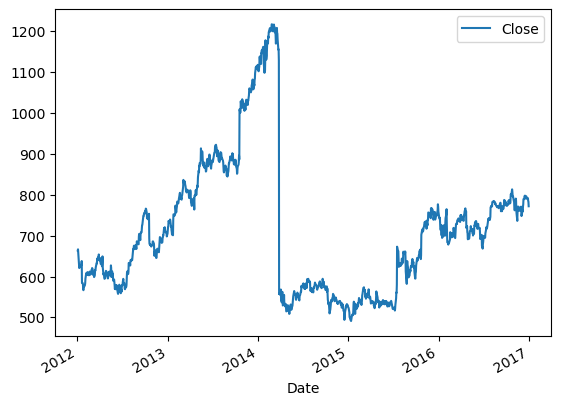

In [10]:
## Plotting graph for close feature
plt.figure(figsize=(16,5))
trained_data.plot()
plt.show()

In [11]:
# train= trained_data[:round(len(trained_data)*0.80)]
# test= trained_data[round(len(trained_data)*0.80):]

In [12]:
trained_data.head()

,Close
Date,
2012-01-03,663.59
2012-01-04,666.45
2012-01-05,657.21
2012-01-06,648.24
2012-01-09,620.76


## Doing Feature Scaling

In [13]:
## Using the MinMax Scaler to scale the value between 0 and 1
scaler= MinMaxScaler(feature_range=(0,1))
stock_price= scaler.fit_transform(trained_data)

In [14]:
## Checking the shape of the data
stock_price.shape

(1258, 1)

#### Below we will be taking previous 40 days open datasteps to predict the next values 

#### so we are converting our train data as per our input in LTSM layers. i.e for taking 0 to 39 days open price to get 40th day price as output, 1 to 40 for 41, 2 to 41 for 42 

#### Here we are doing Feature Selection

In [15]:
x_train= []
y_train= []

for i in range(40, len(stock_price)):
    x_train.append(stock_price[i-40: i,0])
    y_train.append(stock_price[i,0])
#    print(i)

In [16]:
# x_train

In [17]:
## Taking array of both the datasets
x_train= np.array(x_train)
y_train= np.array(y_train)

#### Checking the shape after taking the timesteps

In [18]:
## We have taken the timesteps of 40
x_train.shape

(1218, 40)

In [19]:
y_train.shape

(1218,)

#### Reshaping the input as per input given to LSTM model

In [20]:
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1],1)

## Building LSTM Network

In [21]:
model= Sequential()
model.add(LSTM(units= 50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units= 50, return_sequences=True,activation= 'relu'))
model.add(Dropout(0.2))

model.add(LSTM(units= 50, return_sequences=True,activation= 'relu'))
model.add(Dropout(0.2))

model.add(LSTM(units= 50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer= 'adam', loss= 'mean_squared_error',metrics = ['accuracy'])

In [22]:
history= model.fit(x_train, y_train, epochs= 100, validation_split= 0.22)

Epoch 1/100
30/30 [==============================] - 19s 194ms/step - loss: 0.0421 - accuracy: 0.0021 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 2/100
30/30 [==============================] - 3s 113ms/step - loss: 0.0157 - accuracy: 0.0021 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 3/100
30/30 [==============================] - 3s 106ms/step - loss: 0.0119 - accuracy: 0.0021 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 4/100
30/30 [==============================] - 3s 103ms/step - loss: 0.0099 - accuracy: 0.0021 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 5/100
30/30 [==============================] - 3s 112ms/step - loss: 0.0089 - accuracy: 0.0021 - val_loss: 9.6523e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
30/30 [==============================] - 3s 106ms/step - loss: 0.0083 - accuracy: 0.0021 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 7/100
30/30 [==============================] - 3s 110ms/step - loss: 0.0078 - accuracy: 0.0021 - val_loss: 

Epoch 56/100
30/30 [==============================] - 1s 50ms/step - loss: 0.0029 - accuracy: 0.0021 - val_loss: 7.5196e-04 - val_accuracy: 0.0000e+00
Epoch 57/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0024 - accuracy: 0.0021 - val_loss: 6.4279e-04 - val_accuracy: 0.0000e+00
Epoch 58/100
30/30 [==============================] - 2s 63ms/step - loss: 0.0030 - accuracy: 0.0021 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 59/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0031 - accuracy: 0.0021 - val_loss: 7.6266e-04 - val_accuracy: 0.0000e+00
Epoch 60/100
30/30 [==============================] - 2s 61ms/step - loss: 0.0027 - accuracy: 0.0021 - val_loss: 7.4484e-04 - val_accuracy: 0.0000e+00
Epoch 61/100
30/30 [==============================] - 2s 62ms/step - loss: 0.0029 - accuracy: 0.0021 - val_loss: 4.8622e-04 - val_accuracy: 0.0000e+00
Epoch 62/100
30/30 [==============================] - 2s 66ms/step - loss: 0.0031 - accuracy: 0.00

#### As their is much difference inTraining Accuracy & Validation Accuracy it can be said that their is overfitting condition in data

### It can be seen that their is overfitting the reason behind it could be The training data size is too small and does not contain enough data samples ton correctly represent all possible input data values.

##### Analysing Test Data

#### As we have 40 input in our layer, we will concatenate our train and test and will take last 40 values of our training set with test set

In [23]:
## Checkingbthe test data
data_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [24]:
##vChecking the info of data i.e. datatype
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [25]:
## Checking the shape of Test DataSet
data_test.shape

(20, 5)

## Taking Closing Price of Stocks

In [26]:
data_test= data_test[['Close']]
data_test.head()

,Close
Date,
2017-01-03,786.14
2017-01-04,786.90
2017-01-05,794.02
2017-01-06,806.15
2017-01-09,806.65


#### Plotting the Closing Price

<AxesSubplot:xlabel='Date'>

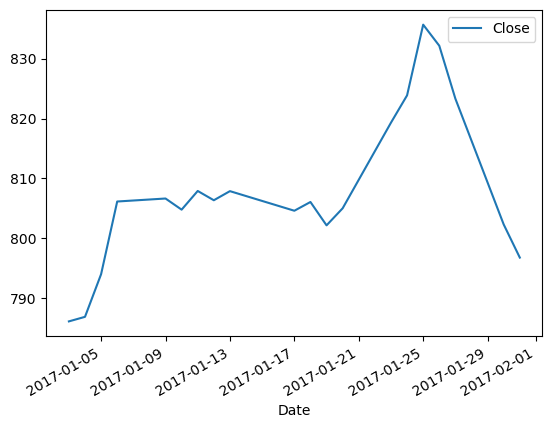

In [27]:
## Graph for closeing feature
data_test.plot()

#### Concating train and test and then will take last 40 train point

In [28]:
total= pd.concat([trained_data['Close'], data_test['Close']], axis= 0)
total.shape

(1278,)

In [29]:
## Creating new dataframe
data_test1= total[len(total)- len(data_test)-40:].values
data_test1

array([762.13, 762.02, 782.52, 790.51, 785.31, 762.56, 754.02, 736.08,
       758.49, 764.48, 771.23, 760.54, 769.2 , 768.27, 760.99, 761.68,
       768.24, 770.84, 758.04, 747.92, 750.5 , 762.52, 759.11, 771.19,
       776.42, 789.29, 789.27, 796.1 , 797.07, 797.85, 790.8 , 794.2 ,
       796.42, 794.56, 791.26, 789.91, 791.55, 785.05, 782.79, 771.82,
       786.14, 786.9 , 794.02, 806.15, 806.65, 804.79, 807.91, 806.36,
       807.88, 804.61, 806.07, 802.17, 805.02, 819.31, 823.87, 835.67,
       832.15, 823.31, 802.32, 796.79])

In [30]:
## reshaping it to get it transformed
data_test1= data_test1.reshape(-1,1)
data_test1[7]

array([736.08])

In [31]:
## Checking the max value
data_test1.max()

835.67

In [32]:
## Fitting the data
test_input= scaler.fit_transform(data_test1)
test_input

array([[0.26157245],
       [0.26046792],
       [0.46631188],
       [0.54654082],
       [0.49432674],
       [0.26589015],
       [0.18013857],
       [0.        ],
       [0.22502259],
       [0.28516919],
       [0.35294708],
       [0.24560699],
       [0.33256351],
       [0.32322522],
       [0.25012551],
       [0.25705392],
       [0.32292399],
       [0.34903103],
       [0.22050407],
       [0.11888744],
       [0.14479365],
       [0.2654885 ],
       [0.23124812],
       [0.35254544],
       [0.40506075],
       [0.53429059],
       [0.53408977],
       [0.60267095],
       [0.61241088],
       [0.620243  ],
       [0.54945276],
       [0.58359273],
       [0.60588412],
       [0.58720755],
       [0.55407169],
       [0.54051612],
       [0.55698363],
       [0.49171604],
       [0.46902299],
       [0.35887137],
       [0.50266091],
       [0.5102922 ],
       [0.58178532],
       [0.7035847 ],
       [0.70860528],
       [0.68992871],
       [0.72125715],
       [0.705

In [33]:
test_input.max()

1.0

### Creating the input for LSTM Prediction

In [34]:
x_test= []
for i in range(40,60):
  x_test.append(test_input[i-40:i, 0])

In [35]:
x_test= np.array(x_test)

### Reshaping the input for LSTM prediction

In [36]:
## Reshaping and viewing the frame
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_test

array([[[0.26157245],
        [0.26046792],
        [0.46631188],
        [0.54654082],
        [0.49432674],
        [0.26589015],
        [0.18013857],
        [0.        ],
        [0.22502259],
        [0.28516919],
        [0.35294708],
        [0.24560699],
        [0.33256351],
        [0.32322522],
        [0.25012551],
        [0.25705392],
        [0.32292399],
        [0.34903103],
        [0.22050407],
        [0.11888744],
        [0.14479365],
        [0.2654885 ],
        [0.23124812],
        [0.35254544],
        [0.40506075],
        [0.53429059],
        [0.53408977],
        [0.60267095],
        [0.61241088],
        [0.620243  ],
        [0.54945276],
        [0.58359273],
        [0.60588412],
        [0.58720755],
        [0.55407169],
        [0.54051612],
        [0.55698363],
        [0.49171604],
        [0.46902299],
        [0.35887137]],

       [[0.26046792],
        [0.46631188],
        [0.54654082],
        [0.49432674],
        [0.26589015],
        

In [37]:
## Checking the shape 
x_test.shape

(20, 40, 1)

### Predicting the closing Price of Stock using Test Data

In [38]:
predicted_value= model.predict(x_test)
predicted_value

1/1 [==============================] - 1s 1s/step


array([[0.45041126],
       [0.4297737 ],
       [0.43722224],
       [0.45762223],
       [0.49155176],
       [0.5381511 ],
       [0.5907198 ],
       [0.6415064 ],
       [0.6822592 ],
       [0.70776993],
       [0.712314  ],
       [0.7041369 ],
       [0.6860471 ],
       [0.67819387],
       [0.68662035],
       [0.7131735 ],
       [0.76116437],
       [0.82089007],
       [0.87064534],
       [0.80157095]], dtype=float32)

In [39]:
## transforming the predicted value in inverse form
predicted_value= scaler.inverse_transform(predicted_value)
predicted_value

array([[780.93646],
       [778.88116],
       [779.623  ],
       [781.6546 ],
       [785.0336 ],
       [789.67444],
       [794.9098 ],
       [799.96765],
       [804.0262 ],
       [806.5668 ],
       [807.01935],
       [806.205  ],
       [804.4034 ],
       [803.62134],
       [804.4605 ],
       [807.1049 ],
       [811.88434],
       [817.8324 ],
       [822.7876 ],
       [815.90845]], dtype=float32)

In [40]:
data_test['predicted_value']= predicted_value
data_test.head()

,Close,predicted_value
Date,,
2017-01-03,786.14,780.936462
2017-01-04,786.90,778.881165
2017-01-05,794.02,779.622986
2017-01-06,806.15,781.654602
2017-01-09,806.65,785.033630


### Plotting the Graph between Actual Price and Predicted Price

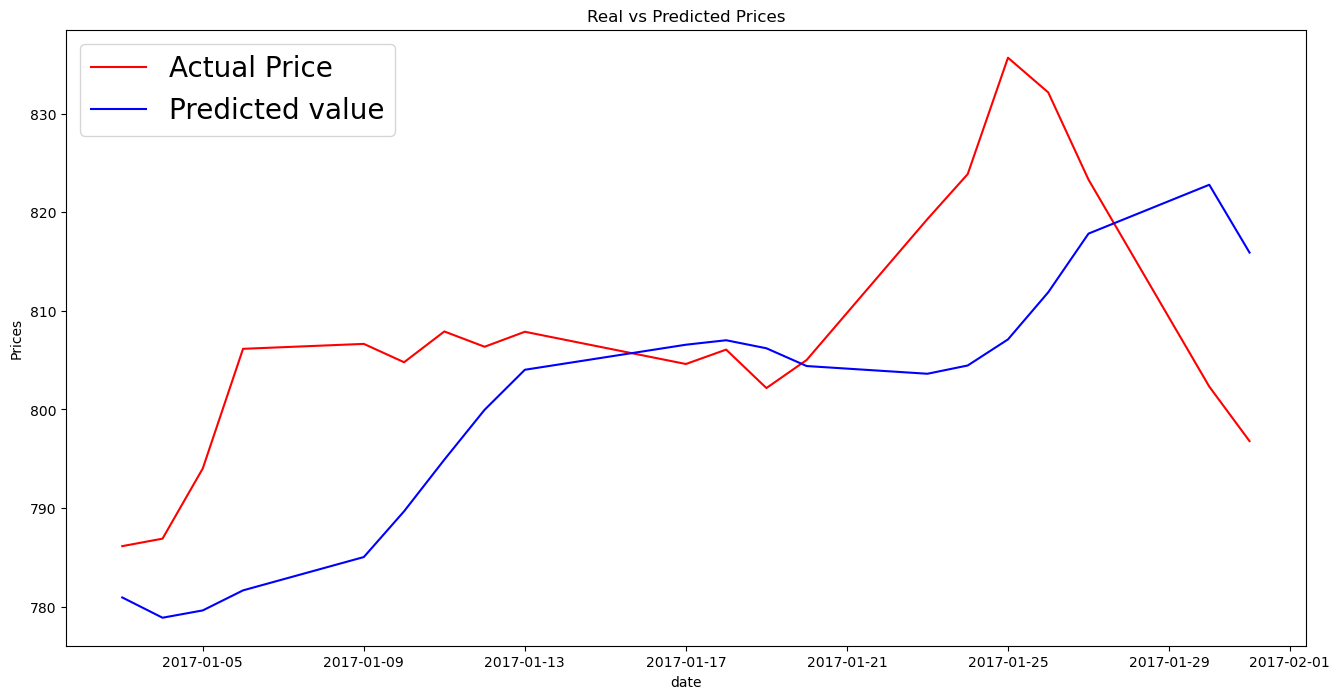

In [41]:
plt.figure(figsize= (16,8))
plt.plot(data_test['Close'], 'red', label= 'Actual Price')
plt.plot(data_test['predicted_value'], 'blue', label= 'Predicted value')
plt.xlabel('date')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [42]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Conclusion
As you can see above, the model can predict the trend of the actual stock prices very closely. The accuracy of the model can be enhanced by training with more data and increasing the LSTM layers.

### Plotting the Validation loss curve to find out if it is good fit or not

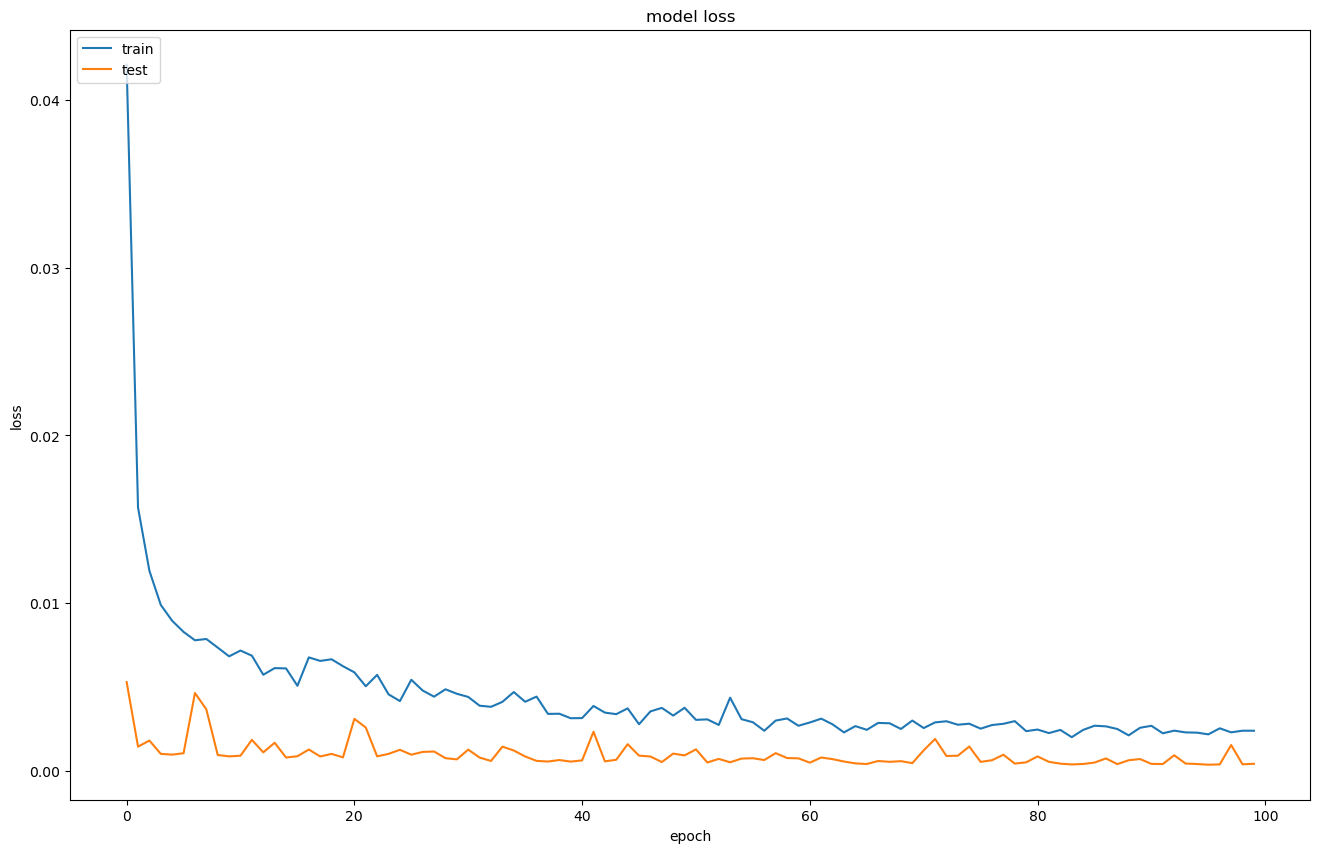

In [43]:
plt.figure(figsize= (16,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Conclusion
As you can see above, the model can predict the trend of the actual stock prices very closely. The accuracy of the model can be enhanced by training with more data and increasing the LSTM layers.

                                - - - - - - - - X X X X X X X X - - - - - - - - 